In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load the dataset
data = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [4]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [5]:
print(data.describe())

              rank   subscribers   video views        uploads  \
count  1006.000000  1.003000e+03  1.006000e+03    1006.000000   
mean    497.472167  2.319501e+07  1.112411e+10    9168.335984   
std     288.738758  1.783047e+07  1.424148e+10   34028.189437   
min       1.000000  1.230000e+07  0.000000e+00       0.000000   
25%     247.250000  1.450000e+07  4.281427e+09     194.000000   
50%     498.500000  1.770000e+07  7.751292e+09     726.500000   
75%     748.750000  2.475000e+07  1.357357e+10    2606.500000   
max     995.000000  2.450000e+08  2.280000e+11  301308.000000   

       video_views_rank  country_rank  channel_type_rank  \
count      1.005000e+03    887.000000         971.000000   
mean       5.607670e+05    384.289741         742.311020   
std        1.368886e+06   1227.359768        1938.126477   
min        1.000000e+00      1.000000           1.000000   
25%        3.220000e+02     11.000000          26.000000   
50%        9.190000e+02     50.000000          65.0000

In [6]:
data.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [7]:
# Handle missing values by filling with zeros or appropriate values
data.fillna(0, inplace=True)

In [8]:
# Ensure numeric columns are properly formatted
data['subscribers'] = pd.to_numeric(data['subscribers'], errors='coerce')
data['video views'] = pd.to_numeric(data['video views'], errors='coerce')
data['uploads'] = pd.to_numeric(data['uploads'], errors='coerce')
data['lowest_monthly_earnings'] = pd.to_numeric(
    data['lowest_monthly_earnings'], errors='coerce')
data['highest_monthly_earnings'] = pd.to_numeric(
    data['highest_monthly_earnings'], errors='coerce')
data['lowest_yearly_earnings'] = pd.to_numeric(
    data['lowest_yearly_earnings'], errors='coerce')
data['highest_yearly_earnings'] = pd.to_numeric(
    data['highest_yearly_earnings'], errors='coerce')
data['subscribers_for_last_30_days'] = pd.to_numeric(
    data['subscribers_for_last_30_days'], errors='coerce')
data['video_views_for_the_last_30_days'] = pd.to_numeric(
    data['video_views_for_the_last_30_days'], errors='coerce')

In [9]:
# Convert date columns to datetime
data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')

In [10]:
# Calculate average subscribers gained per month
data['months_active'] = (
    (pd.to_datetime('today') - data['created_date']).dt.days / 30).astype(int)
data['avg_subscribers_per_month'] = data['subscribers'] / data['months_active']

In [11]:
# Question 1: Top 10 YouTube channels based on the number of subscribers
top_10_channels = data.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
print("Top 10 YouTube channels based on the number of subscribers:")
print(top_10_channels)

Top 10 YouTube channels based on the number of subscribers:
                     Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [12]:
# Question 2: Category with the highest average number of subscribers
category_avg_subs = data.groupby('category')['subscribers'].mean().idxmax()
print(
    f"Category with the highest average number of subscribers: {category_avg_subs}")

Category with the highest average number of subscribers: Shows


In [13]:
# Question 3: Average number of videos uploaded by YouTube channels in each category
avg_uploads_per_category = data.groupby('category')['uploads'].mean()
print("Average number of videos uploaded by YouTube channels in each category:")
print(avg_uploads_per_category)

Average number of videos uploaded by YouTube channels in each category:
category
0                           790.345455
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [14]:
# Question 4: Top 5 countries with the highest number of YouTube channels
top_5_countries = data['Country'].value_counts().nlargest(5)
print("Top 5 countries with the highest number of YouTube channels:")
print(top_5_countries)

Top 5 countries with the highest number of YouTube channels:
United States     315
India             169
0                 125
Brazil             62
United Kingdom     44
Name: Country, dtype: int64


In [15]:
# Question 5: Distribution of channel types across different categories
channel_type_distribution = data.groupby(
    ['category', 'channel_type']).size().unstack().fillna(0)
print("Distribution of channel types across different categories:")
print(channel_type_distribution)

Distribution of channel types across different categories:
channel_type             0  Animals  Autos  Comedy  Education  Entertainment  \
category                                                                       
0                      4.0      0.0    0.0     0.0        4.0           16.0   
Autos & Vehicles       0.0      0.0    2.0     0.0        0.0            1.0   
Comedy                 2.0      0.0    0.0    39.0        0.0           20.0   
Education              0.0      0.0    0.0     0.0       36.0            3.0   
Entertainment          8.0      0.0    1.0     5.0        2.0          168.0   
Film & Animation       1.0      0.0    0.0     1.0        2.0           16.0   
Gaming                 2.0      0.0    1.0     1.0        0.0           18.0   
Howto & Style          3.0      0.0    0.0     0.0        0.0            7.0   
Movies                 0.0      0.0    0.0     0.0        0.0            0.0   
Music                  4.0      0.0    0.0     0.0        1.0

In [16]:
# Question 6: Correlation between the number of subscribers and total video views
correlation_subs_views = data['subscribers'].corr(data['video views'])
print(
    f"Correlation between the number of subscribers and total video views: {correlation_subs_views}")

Correlation between the number of subscribers and total video views: 0.7474871881566304


In [17]:
# Question 7: Monthly earnings variation across different categories
monthly_earnings_variation = data.groupby(
    'category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
print("Monthly earnings variation across different categories:")
print(monthly_earnings_variation)

Monthly earnings variation across different categories:
                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
0                                 54272.493636              8.683958e+05
Autos & Vehicles                  74966.666667              1.190900e+06
Comedy                            41332.285714              6.597635e+05
Education                         46863.239348              7.518043e+05
Entertainment                     39393.724370              6.293549e+05
Film & Animation                  46802.533556              7.489841e+05
Gaming                            16965.790316              2.720201e+05
Howto & Style                     12022.350500              1.920441e+05
Movies                            28400.000000              4.547000e+05
Music                             34671.696798              5.535735e+05
News & Politics                   40192.625000              6.426320

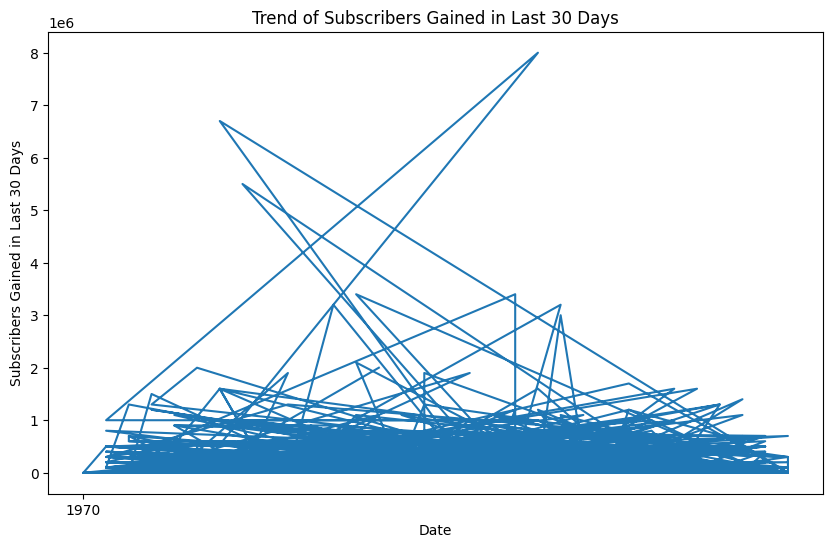

In [18]:
# Question 8: Overall trend in subscribers gained in the last 30 days
plt.figure(figsize=(10, 6))
plt.plot(data['created_date'], data['subscribers_for_last_30_days'])
plt.xlabel('Date')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.title('Trend of Subscribers Gained in Last 30 Days')
plt.show()

c:\Users\manch\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


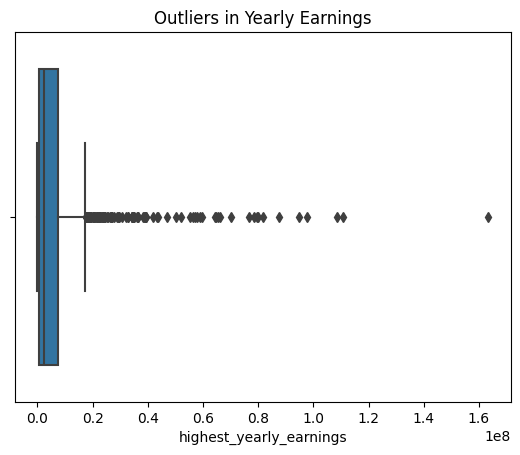

In [19]:
# Question 9: Outliers in terms of yearly earnings
sns.boxplot(data['highest_yearly_earnings'])
plt.title('Outliers in Yearly Earnings')
plt.show()

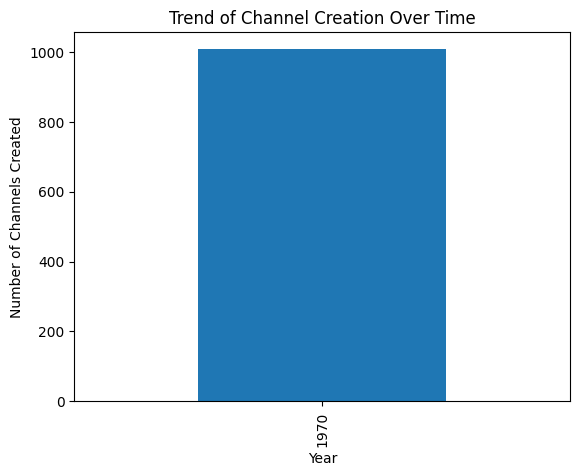

In [20]:
# Question 10: Distribution of channel creation dates and trend over time
data['created_year'] = data['created_date'].dt.year
creation_trend = data['created_year'].value_counts().sort_index()
creation_trend.plot(kind='bar')
plt.title('Trend of Channel Creation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.show()

In [21]:
# Question 11: Relationship between gross tertiary education enrollment and number of YouTube channels in a country
education_enrollment_correlation = data.groupby('Country')[
    'Gross tertiary education enrollment (%)'].mean().corr(data.groupby('Country')['Youtuber'].count())
print(
    f"Correlation between gross tertiary education enrollment and number of YouTube channels in a country: {education_enrollment_correlation}")

Correlation between gross tertiary education enrollment and number of YouTube channels in a country: 0.031826490053972784


In [22]:
# Question 12: Unemployment rate variation among the top 10 countries with the highest number of YouTube channels
top_10_countries = data['Country'].value_counts().nlargest(10).index
unemployment_rate_variation = data[data['Country'].isin(
    top_10_countries)].groupby('Country')['Unemployment rate'].mean()
print("Unemployment rate variation among the top 10 countries with the highest number of YouTube channels:")
print(unemployment_rate_variation)

Unemployment rate variation among the top 10 countries with the highest number of YouTube channels:
Country
0                  0.00
Brazil            12.08
India              5.36
Indonesia          4.69
Mexico             3.42
South Korea        4.15
Spain             13.96
Thailand           0.75
United Kingdom     3.85
United States     14.70
Name: Unemployment rate, dtype: float64


In [23]:
# Question 13: Average urban population percentage in countries with YouTube channels
average_urban_population = data.groupby('Country')['Urban_population'].mean()
print("Average urban population percentage in countries with YouTube channels:")
print(average_urban_population)

Average urban population percentage in countries with YouTube channels:
Country
0                               0.0
Afghanistan               9797273.0
Andorra                         0.0
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   115782416.0
Jordan                    9213048.0
Kuwait              

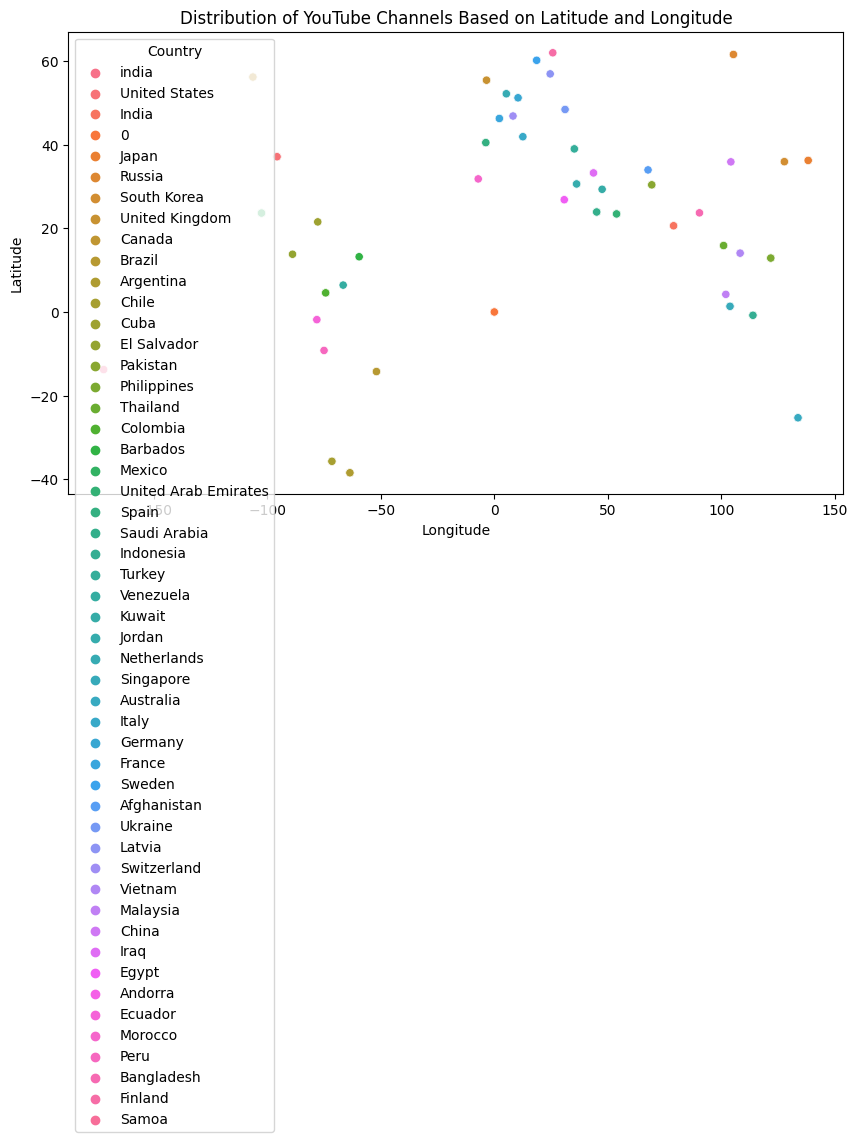

In [24]:
# Question 14: Patterns in the distribution of YouTube channels based on latitude and longitude coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['Country'])
plt.title('Distribution of YouTube Channels Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [25]:
# Question 15: Correlation between the number of subscribers and the population of a country
correlation_subs_population = data['subscribers'].corr(data['Population'])
print(
    f"Correlation between the number of subscribers and the population of a country: {correlation_subs_population}")

Correlation between the number of subscribers and the population of a country: 0.06410545837537618


In [26]:
# Question 16: Comparison of the top 10 countries with the highest number of YouTube channels in terms of total population
top_10_countries_population = data[data['Country'].isin(
    top_10_countries)].groupby('Country')['Population'].mean()
print("Comparison of the top 10 countries with the highest number of YouTube channels in terms of total population:")
print(top_10_countries_population)

Comparison of the top 10 countries with the highest number of YouTube channels in terms of total population:
Country
0                 0.000000e+00
Brazil            2.125594e+08
India             1.366418e+09
Indonesia         2.702039e+08
Mexico            1.260140e+08
South Korea       5.170910e+07
Spain             4.707678e+07
Thailand          6.962558e+07
United Kingdom    6.683440e+07
United States     3.282395e+08
Name: Population, dtype: float64


In [27]:
# Question 17: Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country
correlation_subs_last_30_days_unemployment = data['subscribers_for_last_30_days'].corr(
    data['Unemployment rate'])
print(
    f"Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country: {correlation_subs_last_30_days_unemployment}")

Correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country: -0.008727124896562282


In [28]:
# Question 18: Distribution of video views for the last 30 days across different channel types
video_views_last_30_days_distribution = data.groupby(
    'channel_type')['video_views_for_the_last_30_days'].mean()
print("Distribution of video views for the last 30 days across different channel types:")
print(video_views_last_30_days_distribution)

Distribution of video views for the last 30 days across different channel types:
channel_type
0                5.315594e+03
Animals          7.073477e+08
Autos            1.766301e+08
Comedy           1.849657e+08
Education        2.007373e+08
Entertainment    2.100718e+08
Film             1.372271e+08
Games            8.668806e+07
Howto            5.865822e+07
Music            1.738952e+08
News             1.750042e+08
Nonprofit        9.759050e+07
People           1.687088e+08
Sports           2.030792e+08
Tech             5.508947e+07
Name: video_views_for_the_last_30_days, dtype: float64


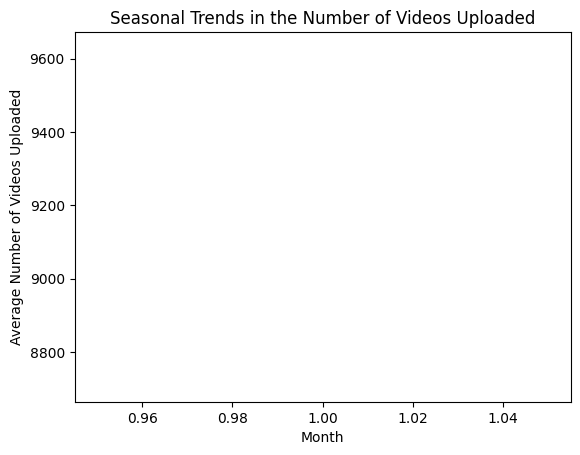

In [29]:
# Question 19: Seasonal trends in the number of videos uploaded by YouTube channels
data['created_month'] = data['created_date'].dt.month
seasonal_trends = data.groupby('created_month')['uploads'].mean()
seasonal_trends.plot(kind='line')
plt.title('Seasonal Trends in the Number of Videos Uploaded')
plt.xlabel('Month')
plt.ylabel('Average Number of Videos Uploaded')
plt.show()

In [30]:
# Question 20: Average number of subscribers gained per month since the creation of YouTube channels
avg_subscribers_gained_per_month = data['avg_subscribers_per_month'].mean()
print(
    f"Average number of subscribers gained per month since the creation of YouTube channels: {avg_subscribers_gained_per_month}")

Average number of subscribers gained per month since the creation of YouTube channels: 34933.30049912008
